# Financial Market A/B Testing Dataset

Comprehensive Dataset Explanation

Task: Analyze and Optimize Market Strategies Through Experiments

This dataset is designed to facilitate A/B testing in the financial market context. It allows users to simulate, analyze, and optimize market strategies by comparing the performance of control and treatment groups under various trading scenarios.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df = pd.read_csv('financial_market_ab_test.csv')
df.head()

,ticker,date,price_before,price_after,volume_before,volume_after,strategy_version,market_condition,return_before,return_after,target
0,EUR/USD,2023-01-02,1871.024737,1461.014437,359710,777505,B,Bullish,-0.061653,0.007305,0.068958
1,BTC/USD,2023-01-03,1173.753049,236.960238,386893,953164,B,Bearish,0.011099,0.071988,0.060889
2,AMZN,2023-01-04,1423.636565,235.387783,124765,332119,B,Bullish,0.016784,-0.057393,-0.074177
3,BTC/USD,2023-01-05,1852.748824,123.006103,388025,164244,B,Bearish,-0.058601,0.021556,0.080157
4,BTC/USD,2023-01-06,1443.753405,1917.352657,949377,453413,A,Bearish,0.070281,-0.083242,-0.153523


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            1000 non-null   object 
 1   date              1000 non-null   object 
 2   price_before      1000 non-null   float64
 3   price_after       1000 non-null   float64
 4   volume_before     1000 non-null   int64  
 5   volume_after      1000 non-null   int64  
 6   strategy_version  1000 non-null   object 
 7   market_condition  1000 non-null   object 
 8   return_before     1000 non-null   float64
 9   return_after      1000 non-null   float64
 10  target            1000 non-null   float64
 11  profit            1000 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


In [8]:
# Average profit

df["profit"] = df["return_after"] - df["return_before"]
df["profit"].head()

0    0.068958
1    0.060889
2   -0.074177
3    0.080157
4   -0.153523
Name: profit, dtype: float64

In [9]:
avg_profit = df.groupby("strategy_version")["profit"].agg(['mean', 'median', 'std', 'count']). reset_index()

In [10]:
print(avg_profit)

  strategy_version      mean    median       std  count
0                A -0.003031 -0.002728  0.082916    483
1                B  0.008523  0.011060  0.082307    517


In [22]:
df.shape

(1000, 12)

In [24]:
df.isna().sum()

ticker              0
date                0
price_before        0
price_after         0
volume_before       0
volume_after        0
strategy_version    0
market_condition    0
return_before       0
return_after        0
target              0
profit              0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [30]:
avg_mean_profit = df.groupby("strategy_version")["profit"].mean()

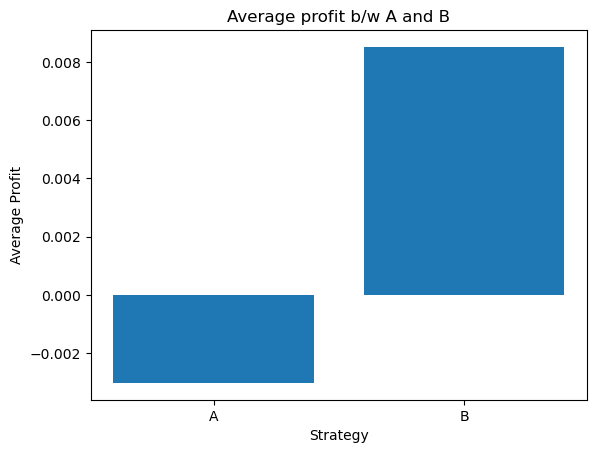

In [32]:
plt.figure()
plt.bar(avg_mean_profit.index, avg_mean_profit.values)

plt.xlabel("Strategy")
plt.ylabel("Average Profit")
plt.title("Average profit b/w A and B")
plt.show()

In [34]:
stats = df.groupby("strategy_version")["profit"].agg(["mean", "std"])

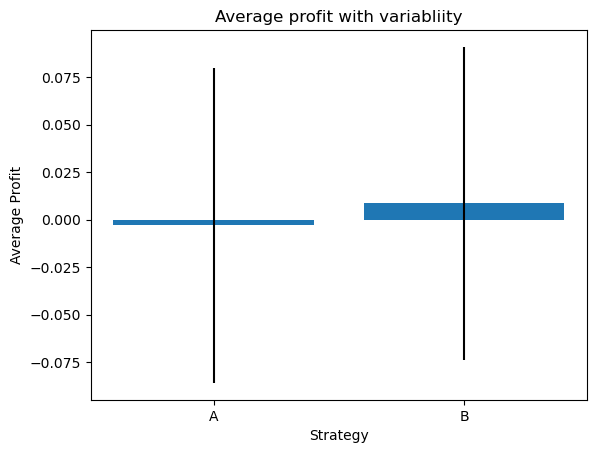

In [36]:
plt.figure()
plt.bar(stats.index, stats["mean"], yerr=stats["std"])

plt.xlabel("Strategy")
plt.ylabel("Average Profit")
plt.title("Average profit with variabliity")
plt.show()

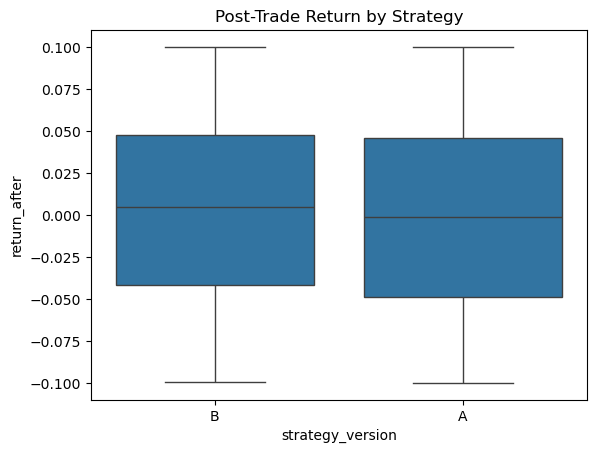

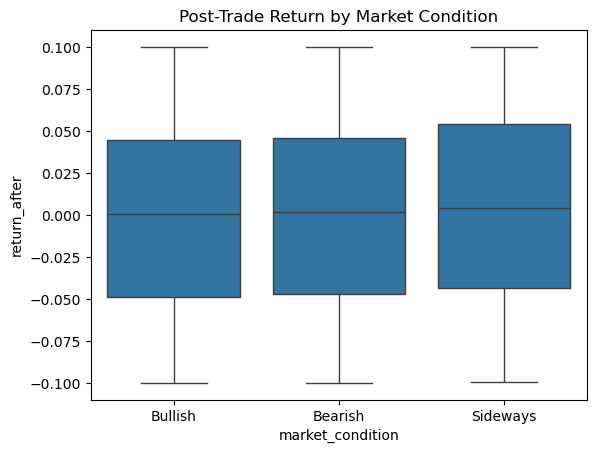

In [38]:
sns.boxplot(x='strategy_version', y='return_after', data=df)
plt.title('Post-Trade Return by Strategy')
plt.show()

sns.boxplot(x='market_condition', y='return_after', data=df)
plt.title('Post-Trade Return by Market Condition')
plt.show()

In [44]:
df.tail()

,ticker,date,price_before,price_after,volume_before,volume_after,strategy_version,market_condition,return_before,return_after,target,profit
995,GOOGL,2026-10-26,1501.124161,1964.173090,246144,149441,A,Sideways,-0.074884,-0.019102,0.055782,0.055782
996,AAPL,2026-10-27,1073.221650,1182.125581,879499,143867,B,Bearish,0.053109,-0.008875,-0.061984,-0.061984
997,AAPL,2026-10-28,1392.432780,593.129388,677999,71021,A,Bearish,-0.057962,0.041152,0.099113,0.099113
998,EUR/USD,2026-10-29,179.178511,930.292183,196784,370349,B,Bullish,-0.035311,0.064168,0.099479,0.099479
999,AMZN,2026-10-30,261.104830,1227.765777,935137,462370,B,Sideways,0.063847,-0.052731,-0.116578,-0.116578


In [46]:
df.describe()

,price_before,price_after,volume_before,volume_after,return_before,return_after,target,profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1050.464151,1046.948389,496237.225000,517045.527000,-0.002686,0.000257,0.002943,0.002943
std,556.165184,548.718460,284876.038329,282563.076918,0.058713,0.056566,0.082762,0.082762
min,108.800844,100.255917,3187.000000,1917.000000,-0.099850,-0.099874,-0.199067,-0.199067
25%,547.826899,593.646942,265193.750000,275485.250000,-0.053926,-0.046760,-0.056335,-0.056335
50%,1058.272542,1048.723987,484448.500000,502749.000000,-0.004915,0.001758,0.004636,0.004636
75%,1515.583885,1527.331884,743872.000000,770801.000000,0.048517,0.046966,0.063986,0.063986
max,1998.886079,1996.860272,999555.000000,998159.000000,0.099810,0.099970,0.191261,0.191261


In [48]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.cluster import KMeans

<Axes: xlabel='profit', ylabel='Count'>

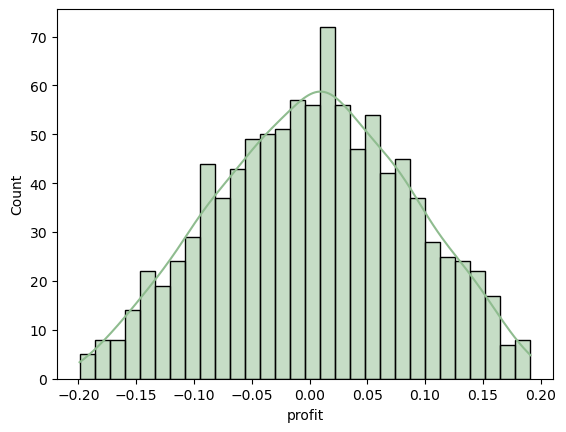

In [62]:
sns.histplot(df["profit"], bins=30, kde=True, color= 'darkseagreen')

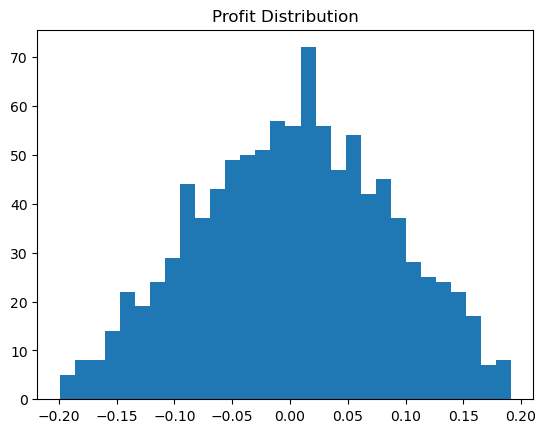

In [52]:
plt.hist(df["profit"], bins=30)
plt.title("Profit Distribution")
plt.show()

In [64]:
from scipy.stats import shapiro
shapiro(df["profit"])

ShapiroResult(statistic=0.9923109228100767, pvalue=4.616414217513733e-05)

In [66]:
df["profit"].skew()

-0.05221969975641673

In [68]:
le = LabelEncoder()
df['strategy_num'] = le.fit_transform(df['strategy_version'])
df['ticker_num'] = le.fit_transform(df['ticker'])
df['market_num'] = le.fit_transform(df['market_condition'])

df['price_change'] = df['price_after'] - df['price_before']
df['volume_change'] = df['volume_after'] - df['volume_before']
df['return_diff'] = df['return_after'] - df['return_before']
df['is_profit'] = (df['return_after'] > 0).astype(int)

feature_cols = [
    'strategy_num', 'ticker_num', 'market_num',
    'price_change', 'volume_change', 'return_before', 'return_after', 'return_diff'
]
df[feature_cols].describe()

,strategy_num,ticker_num,market_num,price_change,volume_change,return_before,return_after,return_diff
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.517000,1.976000,0.997000,-3.515762,20808.30200,-0.002686,0.000257,0.002943
std,0.499961,1.413302,0.818328,769.172352,397550.08591,0.058713,0.056566,0.082762
min,0.000000,0.000000,0.000000,-1757.528129,-905514.00000,-0.099850,-0.099874,-0.199067
25%,0.000000,1.000000,0.000000,-583.777023,-248491.25000,-0.053926,-0.046760,-0.056335
50%,1.000000,2.000000,1.000000,-10.526108,16799.00000,-0.004915,0.001758,0.004636
75%,1.000000,3.000000,2.000000,592.191468,304888.75000,0.048517,0.046966,0.063986
max,1.000000,4.000000,2.000000,1815.150805,971880.00000,0.099810,0.099970,0.191261
